In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set()

In [2]:
raw_data = pd.read_csv('bakken_bha_data.csv')

In [3]:
data = raw_data.copy()
data = raw_data.drop(['Comment'],axis=1)
data

,Well Name,BHA Name,BHA No.,Make,Bit Diameter,Bit Model,Serial No.,Item Description,Make.1,Model,...,RPG,ROP,Primary Job Type,Depth In,Depth Out,Depth Drilled,Original Drilling Rig,Rig,LAT,LON
0,DOROTHY 14-12TFH,Lateral # 1,5.0,Reed,6.00,TKC53_____,E260403,Mud Motor,Diablo,Diablo,...,0.840,180.1,ORIGINAL DRILLING,"11,315.00","16,043.00","4,728.00",H&P 492,"HELMERICH & PAYNE, 492",47.471107,-102.731606
1,DOROTHY 14-12TFH,Lateral # 2,6.0,Reed,6.00,TKC63_____,E259362,Mud Motor,NOV,500ERTcr6780 (POB),...,0.790,138.1,ORIGINAL DRILLING,"16,043.00","21,257.00","5,214.00",H&P 492,"HELMERICH & PAYNE, 492",47.471107,-102.731606
2,DOROTHY 14-12TFH,Surface,1.0,Other,13.50,ATLAS_____,61669,Mud Motor,Predator,Predator,...,0.160,255.3,ORIGINAL DRILLING,107,"2,277.00","2,170.00",H&P 492,"HELMERICH & PAYNE, 492",47.471107,-102.731606
3,DOROTHY 14-12TFH,Intermediate,2.0,Security,8.75,GT65WK____,13188716,Mud Motor,NOV,700ERTcr7857 (280XT),...,0.230,157.9,ORIGINAL DRILLING,"2,277.00","8,315.00","6,038.00",H&P 492,"HELMERICH & PAYNE, 492",47.471107,-102.731606
4,DOROTHY 14-12TFH,Intermediate,3.0,Reed,8.75,TKC56U1___,A264269,Mud Motor,NOV,700ERTcr7857 (280XT),...,0.230,88.3,ORIGINAL DRILLING,"8,315.00","10,500.00","2,185.00",H&P 492,"HELMERICH & PAYNE, 492",47.471107,-102.731606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,SHORTALL USA 14-9H,Vertical,2.0,Smith,8.75,XS616_____,JP8528,Mud Motor,NOV,700ERT6778 (POB-PXP),...,0.320,207.4,ORIGINAL DRILLING,"2,065.00","7,977.00","5,912.00",Patterson 811,"PATTERSON DRILLING, 811",47.906250,-102.600880
463,SHORTALL USA 14-9H,Vertical,3.0,Reed,8.75,TKC66_____,A263871,Mud Motor,NOV,700ERT6778 (POB-PXP),...,0.320,135.3,ORIGINAL DRILLING,"7,977.00","10,141.00","2,164.00",Patterson 811,"PATTERSON DRILLING, 811",47.906250,-102.600880
464,SHORTALL USA 14-9H,Curve,4.0,Ulterra,8.75,CF516_____,50531,Mud Motor,NOV,675ERTcr4570 (280XT),...,0.486,75.1,ORIGINAL DRILLING,"10,141.00","10,967.00",826,Patterson 811,"PATTERSON DRILLING, 811",47.906250,-102.600880
465,SHORTALL USA 14-9H,Lateral,5.0,Reed,6.00,TKC53_____,A265607,Mud Motor,Baker Huges,X-treme,...,1.030,185.3,ORIGINAL DRILLING,"10,967.00","18,655.00","7,688.00",Patterson 811,"PATTERSON DRILLING, 811",47.906250,-102.600880


In [4]:
data.describe()

,BHA No.,Bit Diameter,Stage,RPG,ROP,LAT,LON
count,466.000000,466.000000,467.000000,467.000000,458.000000,466.000000,466.000000
mean,3.317597,9.028240,7.161670,0.417899,160.746070,47.675240,-102.651833
std,1.787048,2.576886,1.652975,0.256584,71.680266,0.243834,0.087362
min,1.000000,5.880000,4.000000,0.160000,10.500000,47.270960,-102.859726
25%,2.000000,6.000000,5.850000,0.230000,101.450000,47.445465,-102.731606
50%,3.000000,8.750000,7.000000,0.320000,161.250000,47.828598,-102.610930
75%,5.000000,8.750000,8.000000,0.715000,207.325000,47.898947,-102.585420
max,9.000000,14.750000,11.800000,1.030000,524.700000,47.983673,-102.549310


In [5]:
#Checking for null values
data.isna().sum()

Well Name                0
BHA Name                 0
BHA No.                  1
Make                     1
Bit Diameter             1
Bit Model                1
Serial No.               1
Item Description         0
Make.1                   0
Model                    0
Lobe                     0
Stage                    0
RPG                      0
ROP                      9
Primary Job Type         0
Depth In                 5
Depth Out                5
Depth Drilled            9
Original Drilling Rig    0
Rig                      1
LAT                      1
LON                      1
dtype: int64

In [6]:
data_null = data.isna().mean()*100
data_null
#Missing values do not contribute heavily to whole dataset, so they will be deleted

Well Name                0.000000
BHA Name                 0.000000
BHA No.                  0.214133
Make                     0.214133
Bit Diameter             0.214133
Bit Model                0.214133
Serial No.               0.214133
Item Description         0.000000
Make.1                   0.000000
Model                    0.000000
Lobe                     0.000000
Stage                    0.000000
RPG                      0.000000
ROP                      1.927195
Primary Job Type         0.000000
Depth In                 1.070664
Depth Out                1.070664
Depth Drilled            1.927195
Original Drilling Rig    0.000000
Rig                      0.214133
LAT                      0.214133
LON                      0.214133
dtype: float64

In [7]:
data = data.dropna(axis=0,subset=data.columns.values)
data

,Well Name,BHA Name,BHA No.,Make,Bit Diameter,Bit Model,Serial No.,Item Description,Make.1,Model,...,RPG,ROP,Primary Job Type,Depth In,Depth Out,Depth Drilled,Original Drilling Rig,Rig,LAT,LON
0,DOROTHY 14-12TFH,Lateral # 1,5.0,Reed,6.00,TKC53_____,E260403,Mud Motor,Diablo,Diablo,...,0.840,180.1,ORIGINAL DRILLING,"11,315.00","16,043.00","4,728.00",H&P 492,"HELMERICH & PAYNE, 492",47.471107,-102.731606
1,DOROTHY 14-12TFH,Lateral # 2,6.0,Reed,6.00,TKC63_____,E259362,Mud Motor,NOV,500ERTcr6780 (POB),...,0.790,138.1,ORIGINAL DRILLING,"16,043.00","21,257.00","5,214.00",H&P 492,"HELMERICH & PAYNE, 492",47.471107,-102.731606
2,DOROTHY 14-12TFH,Surface,1.0,Other,13.50,ATLAS_____,61669,Mud Motor,Predator,Predator,...,0.160,255.3,ORIGINAL DRILLING,107,"2,277.00","2,170.00",H&P 492,"HELMERICH & PAYNE, 492",47.471107,-102.731606
3,DOROTHY 14-12TFH,Intermediate,2.0,Security,8.75,GT65WK____,13188716,Mud Motor,NOV,700ERTcr7857 (280XT),...,0.230,157.9,ORIGINAL DRILLING,"2,277.00","8,315.00","6,038.00",H&P 492,"HELMERICH & PAYNE, 492",47.471107,-102.731606
4,DOROTHY 14-12TFH,Intermediate,3.0,Reed,8.75,TKC56U1___,A264269,Mud Motor,NOV,700ERTcr7857 (280XT),...,0.230,88.3,ORIGINAL DRILLING,"8,315.00","10,500.00","2,185.00",H&P 492,"HELMERICH & PAYNE, 492",47.471107,-102.731606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,SHORTALL USA 14-9H,Vertical,2.0,Smith,8.75,XS616_____,JP8528,Mud Motor,NOV,700ERT6778 (POB-PXP),...,0.320,207.4,ORIGINAL DRILLING,"2,065.00","7,977.00","5,912.00",Patterson 811,"PATTERSON DRILLING, 811",47.906250,-102.600880
463,SHORTALL USA 14-9H,Vertical,3.0,Reed,8.75,TKC66_____,A263871,Mud Motor,NOV,700ERT6778 (POB-PXP),...,0.320,135.3,ORIGINAL DRILLING,"7,977.00","10,141.00","2,164.00",Patterson 811,"PATTERSON DRILLING, 811",47.906250,-102.600880
464,SHORTALL USA 14-9H,Curve,4.0,Ulterra,8.75,CF516_____,50531,Mud Motor,NOV,675ERTcr4570 (280XT),...,0.486,75.1,ORIGINAL DRILLING,"10,141.00","10,967.00",826,Patterson 811,"PATTERSON DRILLING, 811",47.906250,-102.600880
465,SHORTALL USA 14-9H,Lateral,5.0,Reed,6.00,TKC53_____,A265607,Mud Motor,Baker Huges,X-treme,...,1.030,185.3,ORIGINAL DRILLING,"10,967.00","18,655.00","7,688.00",Patterson 811,"PATTERSON DRILLING, 811",47.906250,-102.600880


In [8]:
#All null values have been erased
data.isna().sum()

Well Name                0
BHA Name                 0
BHA No.                  0
Make                     0
Bit Diameter             0
Bit Model                0
Serial No.               0
Item Description         0
Make.1                   0
Model                    0
Lobe                     0
Stage                    0
RPG                      0
ROP                      0
Primary Job Type         0
Depth In                 0
Depth Out                0
Depth Drilled            0
Original Drilling Rig    0
Rig                      0
LAT                      0
LON                      0
dtype: int64

In [9]:
data.dtypes

Well Name                 object
BHA Name                  object
BHA No.                  float64
Make                      object
Bit Diameter             float64
Bit Model                 object
Serial No.                object
Item Description          object
Make.1                    object
Model                     object
Lobe                      object
Stage                    float64
RPG                      float64
ROP                      float64
Primary Job Type          object
Depth In                  object
Depth Out                 object
Depth Drilled             object
Original Drilling Rig     object
Rig                       object
LAT                      float64
LON                      float64
dtype: object

In [10]:
data_clean = data.copy()
data_clean['Depth In'] = data_clean['Depth In'].str.replace(',','').astype(float)
data_clean['Depth Out'] = data_clean['Depth Out'].str.replace(',','').astype(float)
data_clean['Depth Drilled'] = data_clean['Depth Drilled'].str.replace(',','').astype(float)
data_clean.dtypes

Well Name                 object
BHA Name                  object
BHA No.                  float64
Make                      object
Bit Diameter             float64
Bit Model                 object
Serial No.                object
Item Description          object
Make.1                    object
Model                     object
Lobe                      object
Stage                    float64
RPG                      float64
ROP                      float64
Primary Job Type          object
Depth In                 float64
Depth Out                float64
Depth Drilled            float64
Original Drilling Rig     object
Rig                       object
LAT                      float64
LON                      float64
dtype: object

In [11]:
num_cols = data_clean.select_dtypes(exclude=['object']).columns
num_cols

Index(['BHA No.', 'Bit Diameter', 'Stage', 'RPG', 'ROP', 'Depth In',
       'Depth Out', 'Depth Drilled', 'LAT', 'LON'],
      dtype='object')

In [12]:
location = data_clean[['LAT','LON']]
location

,LAT,LON
0,47.471107,-102.731606
1,47.471107,-102.731606
2,47.471107,-102.731606
3,47.471107,-102.731606
4,47.471107,-102.731606
...,...,...
462,47.906250,-102.600880
463,47.906250,-102.600880
464,47.906250,-102.600880
465,47.906250,-102.600880


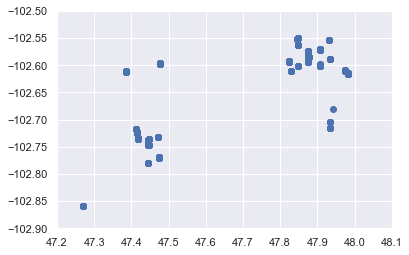

In [13]:
#Plotting well locations to look for clusters
plt.scatter(data_clean['LAT'],data_clean['LON'])
plt.xlim(47.2,48.1)
plt.ylim(-102.9,-102.5)
plt.show()

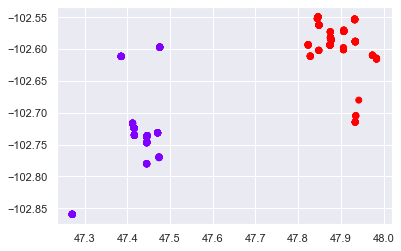

In [14]:
#Grouped all wells using cluster analysis. There are clearly two distinct groups based on location
from sklearn.cluster import KMeans

kmeans = KMeans(2)
kmeans.fit(location)
clusters = data_clean.copy()
clusters['cluster_prediction'] = kmeans.fit_predict(location)
plt.scatter(clusters['LAT'],clusters['LON'],c=clusters['cluster_prediction'],cmap='rainbow')

In [15]:
data_clean['cluster_prediction'] = clusters['cluster_prediction']

<AxesSubplot:xlabel='ROP'>

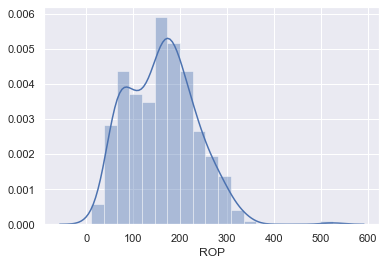

In [16]:
sns.distplot(data_clean['ROP'])

<AxesSubplot:xlabel='ROP'>

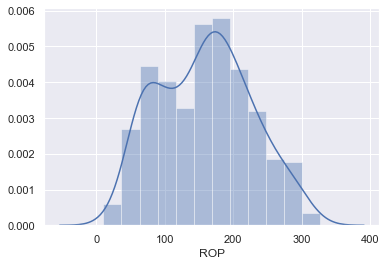

In [17]:
#Dealing with outliers from the right
q = data_clean['ROP'].quantile(0.99)
data_no_outliers = data_clean[data_clean['ROP'] < q]
sns.distplot(data_no_outliers['ROP'])

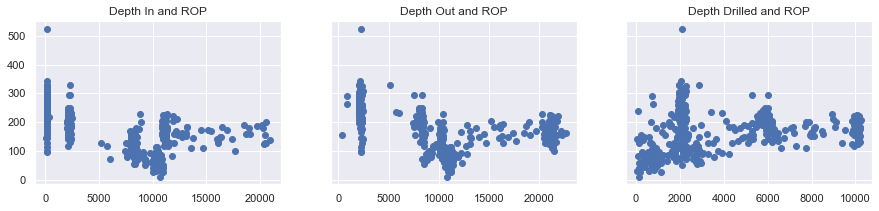

In [18]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_clean['Depth In'],data_clean['ROP'])
ax1.set_title('Depth In and ROP')
ax2.scatter(data_clean['Depth Out'],data_clean['ROP'])
ax2.set_title('Depth Out and ROP')
ax3.scatter(data_clean['Depth Drilled'],data_clean['ROP'])
ax3.set_title('Depth Drilled and ROP')

plt.show()

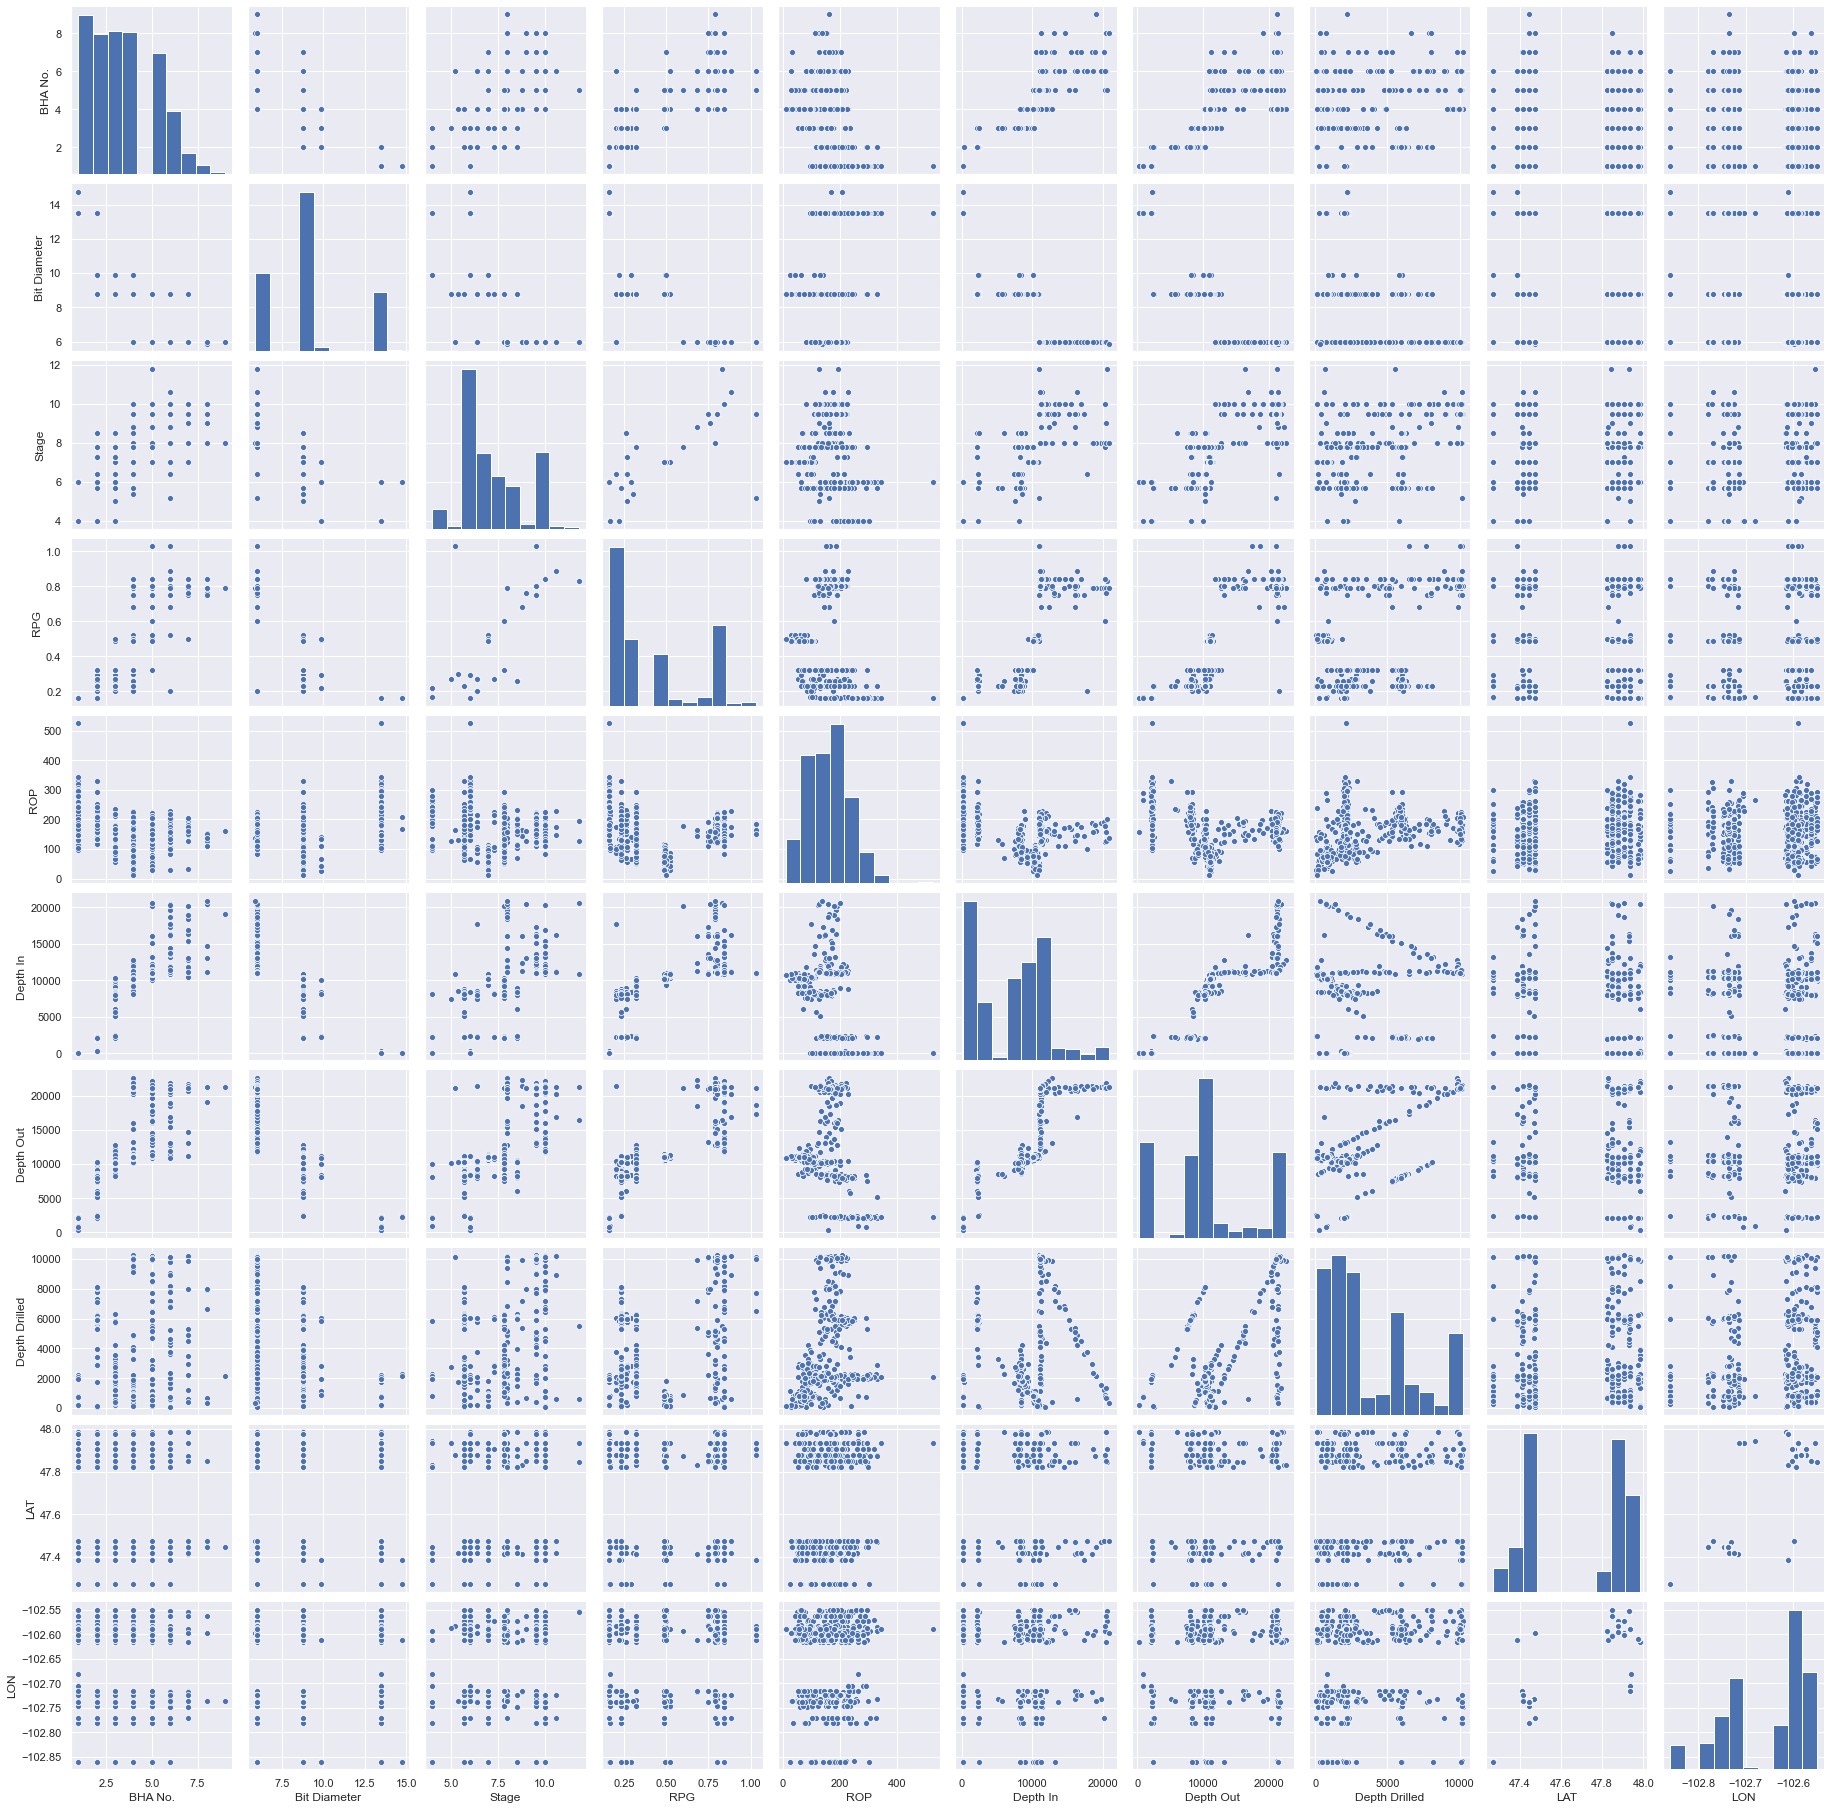

In [19]:
sns.pairplot(data_clean[['Lobe','BHA No.', 'Bit Diameter', 'Stage', 'RPG', 'ROP', 'Depth In',
       'Depth Out', 'Depth Drilled', 'LAT', 'LON']])

<AxesSubplot:>

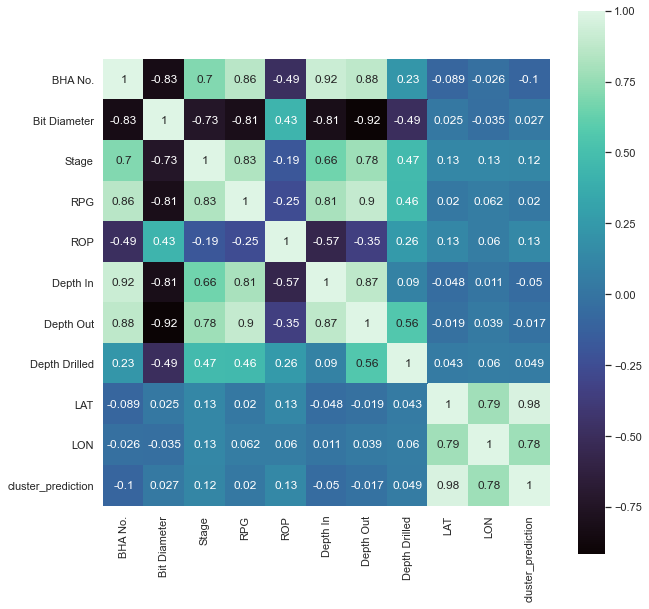

In [20]:
fig=plt.figure(figsize=(10,10))
sns.heatmap(data_clean.corr(),annot=True,square=True,cmap='mako')

In [21]:
cols = ['BHA No.', 'Bit Diameter', 'RPG']
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_clean[cols]
vif = pd.DataFrame()
vif['VIF'] = ["{:.2f}".format(variance_inflation_factor(variables.values, i)) for i in range(variables.shape[1])]
vif['Features'] = variables.columns
vif

,VIF,Features
0,15.66,BHA No.
1,2.23,Bit Diameter
2,14.03,RPG


In [22]:
#Create dummy variables
data_dummies = pd.get_dummies(data_clean,drop_first=True)
data_dummies

,BHA No.,Bit Diameter,Stage,RPG,ROP,Depth In,Depth Out,Depth Drilled,LAT,LON,...,Original Drilling Rig_Nabors B18,Original Drilling Rig_Patterson 811,"Rig_NABORS DRILLING, 18","Rig_NABORS DRILLING, B01","Rig_NABORS DRILLING, B13","Rig_NABORS DRILLING, B18","Rig_NOBLE DRILLING, 1","Rig_NOBLE DRILLING, 3","Rig_NOBLE DRILLING, 4","Rig_PATTERSON DRILLING, 811"
0,5.0,6.00,10.0,0.840,180.1,11315.0,16043.0,4728.0,47.471107,-102.731606,...,0,0,0,0,0,0,0,0,0,0
1,6.0,6.00,8.0,0.790,138.1,16043.0,21257.0,5214.0,47.471107,-102.731606,...,0,0,0,0,0,0,0,0,0,0
2,1.0,13.50,6.0,0.160,255.3,107.0,2277.0,2170.0,47.471107,-102.731606,...,0,0,0,0,0,0,0,0,0,0
3,2.0,8.75,5.7,0.230,157.9,2277.0,8315.0,6038.0,47.471107,-102.731606,...,0,0,0,0,0,0,0,0,0,0
4,3.0,8.75,5.7,0.230,88.3,8315.0,10500.0,2185.0,47.471107,-102.731606,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,2.0,8.75,7.8,0.320,207.4,2065.0,7977.0,5912.0,47.906250,-102.600880,...,0,1,0,0,0,0,0,0,0,1
463,3.0,8.75,7.8,0.320,135.3,7977.0,10141.0,2164.0,47.906250,-102.600880,...,0,1,0,0,0,0,0,0,0,1
464,4.0,8.75,7.0,0.486,75.1,10141.0,10967.0,826.0,47.906250,-102.600880,...,0,1,0,0,0,0,0,0,0,1
465,5.0,6.00,9.5,1.030,185.3,10967.0,18655.0,7688.0,47.906250,-102.600880,...,0,1,0,0,0,0,0,0,0,1


In [23]:
data_dummies.columns.values

array(['BHA No.', 'Bit Diameter', 'Stage', 'RPG', 'ROP', 'Depth In',
       'Depth Out', 'Depth Drilled', 'LAT', 'LON', 'cluster_prediction',
       'Well Name_ALLEN HORN USA 11-2H',
       'Well Name_ARDELLA USA 21-3TFH-2B', 'Well Name_ARDIS USA 21-4TFH',
       'Well Name_ASLAK USA 44-21TFH', 'Well Name_ATKINSON USA 31-17TFH',
       'Well Name_BEATRICE USA 31-15TFH', 'Well Name_BINTZ USA 21-4TFH',
       'Well Name_BLANCHE 14-36H', 'Well Name_BREWSTER 24-23TFH',
       'Well Name_BRYDEN 11-13H', 'Well Name_BUGBEE 24-23H',
       'Well Name_BUXTON 31-15TFH', 'Well Name_CALEB 44-32TFH',
       'Well Name_CANON 21-15H', 'Well Name_DANNER 14-36H',
       'Well Name_DASHA USA 44-11H', 'Well Name_DELMONT 34-23H',
       'Well Name_DIETRICH USA 11-2TFH',
       'Well Name_DONAASON USA 34-21TFH', 'Well Name_DORIS USA 21-15TFH',
       'Well Name_DOROTHY 14-12TFH', 'Well Name_DOVEN 11-27TFH',
       'Well Name_EAGER USA 12-16TFH', 'Well Name_EASTON 44-20H',
       'Well Name_EMIL 24-12TFH', 

In [24]:
dummy_cols = ['ROP','Bit Diameter', 'Stage', 'RPG', 'Depth In',
       'Depth Out', 'Depth Drilled', 'cluster_prediction',
       'Well Name_ALLEN HORN USA 11-2H',
       'Well Name_ARDELLA USA 21-3TFH-2B', 'Well Name_ARDIS USA 21-4TFH',
       'Well Name_ASLAK USA 44-21TFH', 'Well Name_ATKINSON USA 31-17TFH',
       'Well Name_BEATRICE USA 31-15TFH', 'Well Name_BINTZ USA 21-4TFH',
       'Well Name_BLANCHE 14-36H', 'Well Name_BREWSTER 24-23TFH',
       'Well Name_BRYDEN 11-13H', 'Well Name_BUGBEE 24-23H',
       'Well Name_BUXTON 31-15TFH', 'Well Name_CALEB 44-32TFH',
       'Well Name_CANON 21-15H', 'Well Name_DANNER 14-36H',
       'Well Name_DASHA USA 44-11H', 'Well Name_DELMONT 34-23H',
       'Well Name_DIETRICH USA 11-2TFH',
       'Well Name_DONAASON USA 34-21TFH', 'Well Name_DORIS USA 21-15TFH',
       'Well Name_DOROTHY 14-12TFH', 'Well Name_DOVEN 11-27TFH',
       'Well Name_EAGER USA 12-16TFH', 'Well Name_EASTON 44-20H',
       'Well Name_EMIL 24-12TFH', 'Well Name_ERICKSON 31-4H',
       'Well Name_ESTENSON USA 11-2TFH', 'Well Name_ESTHER USA 21-15H',
       'Well Name_EUNICE USA 11-16TFH', 'Well Name_EVENSON USA 41-3H',
       'Well Name_FLOYD USA 21-4H', 'Well Name_FLYNN USA 21-16TFH',
       'Well Name_FOUR BEARS USA 13-16H', 'Well Name_FRANCES USA 11-15H',
       'Well Name_GERHARDT USA 14-21H', 'Well Name_GWEN 44-36TFH',
       'Well Name_HANLON USA 11-28TFH', 'Well Name_HAYES 14-31H',
       'Well Name_HERBERT 41-14H', 'Well Name_HIGGINS 31-26TFH',
       'Well Name_HOLMGREN 41-3H', 'Well Name_HORN USA 21-2H',
       'Well Name_HULL 41-28TFH', 'Well Name_JOCELYN 14-36TFH',
       'Well Name_JONAH USA 11-2H', 'Well Name_JULIA HORN USA 11-2TFH',
       'Well Name_KEYES USA 21-3H', 'Well Name_KINNEY 24-36TFH',
       'Well Name_KLOSTER 24-12H', 'Well Name_LEIDERBACH 11-27H',
       'Well Name_LOTTIO HORN USA 21-2TFH', 'Well Name_MAHER 41-14TFH',
       'Well Name_MASON 14-31TFH', 'Well Name_MCROBERTS USA 14-21TFH',
       'Well Name_MEREDITH 14-24H', 'Well Name_MOLLIE 31-15H',
       'Well Name_NAATUS USA 14-33H', 'Well Name_NOKELBY USA 34-21H',
       'Well Name_OATES 21-27H', 'Well Name_PAPA GEORGE USA 41-4H',
       'Well Name_PARMETER 14-21H', 'Well Name_PERKINS USA 12-16TFH',
       'Well Name_PETERSON USA 41-3TFH', 'Well Name_PLETAN 11-13TFH',
       'Well Name_PRAIRIE CHICKEN USA 11-3TFH',
       'Well Name_RALEIGH 44-20H', 'Well Name_REAGAN 14-21H',
       'Well Name_RITTER 34-12TFH', 'Well Name_ROCK WOMAN USA 41-4TFH',
       'Well Name_ROYAL USA 41-3TFH', 'Well Name_RUTH 44-23TFH',
       'Well Name_SALVESON USA 24-21H', 'Well Name_SARAH 24-12TFH',
       'Well Name_SENNESS 11-27TFH', 'Well Name_SHORTALL USA 14-9H',
       'Well Name_SNIDER 41-26TFH', 'Well Name_STATE EGGERT 24-36H',
       'Well Name_STATE EILEEN 34-36TFH',
       'Well Name_STATE ELIAS 34-36TFH', 'Well Name_STATE ETTA 44-36H',
       'Well Name_SUNWALL USA 41-17H', 'Well Name_SURA USA 44-21TFH',
       'Well Name_THOEN 41-28H', 'Well Name_TOMMERDAHL USA 11-2H',
       'Well Name_TUFTE 24-23TFH', 'Well Name_TURKEY FEET USA 41-17TFH',
       'Well Name_VERNE USA 24-21TFH', 'Well Name_WALDORF USA 12-16H',
       'Well Name_WALSH USA 11-16TFH', 'Well Name_WEASEL USA 11-3H',
       'Well Name_YELLOW BULL USA 14-16H',
       'Well Name_YESENKO USA 11-21TFH',
        'Make.1_Baker Huges',
       'Make.1_DDS', 'Make.1_Diablo', 'Make.1_Dyna-Drill',
       'Make.1_Halliburton', 'Make.1_Hunting', 'Make.1_LEAM',
       'Make.1_NOV', 'Make.1_Newsco', 'Make.1_Predator',
       'Make.1_ProDirectional',
       'Lobe_5/6', 'Lobe_6/7', 'Lobe_7/8',
       'Original Drilling Rig_Nabors B01',
       'Original Drilling Rig_Nabors B13',
       'Original Drilling Rig_Nabors B18',
       'Original Drilling Rig_Patterson 811']

In [25]:
data_preprocessed = data_dummies[dummy_cols]
data_preprocessed

,ROP,Bit Diameter,Stage,RPG,Depth In,Depth Out,Depth Drilled,cluster_prediction,Well Name_ALLEN HORN USA 11-2H,Well Name_ARDELLA USA 21-3TFH-2B,...,Make.1_Newsco,Make.1_Predator,Make.1_ProDirectional,Lobe_5/6,Lobe_6/7,Lobe_7/8,Original Drilling Rig_Nabors B01,Original Drilling Rig_Nabors B13,Original Drilling Rig_Nabors B18,Original Drilling Rig_Patterson 811
0,180.1,6.00,10.0,0.840,11315.0,16043.0,4728.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,138.1,6.00,8.0,0.790,16043.0,21257.0,5214.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,255.3,13.50,6.0,0.160,107.0,2277.0,2170.0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,157.9,8.75,5.7,0.230,2277.0,8315.0,6038.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,88.3,8.75,5.7,0.230,8315.0,10500.0,2185.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,207.4,8.75,7.8,0.320,2065.0,7977.0,5912.0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
463,135.3,8.75,7.8,0.320,7977.0,10141.0,2164.0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
464,75.1,8.75,7.0,0.486,10141.0,10967.0,826.0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
465,185.3,6.00,9.5,1.030,10967.0,18655.0,7688.0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


In [26]:
pd.set_option('display.max_rows',None)
variables2 = data_preprocessed
vif2 = pd.DataFrame()
vif2['VIF'] = ["{:.2f}".format(variance_inflation_factor(variables2.values, i)) for i in range(variables2.shape[1])]
vif2['Features'] = variables2.columns
vif2

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF,Features
0,4.22,ROP
1,50.93,Bit Diameter
2,12.94,Stage
3,19.16,RPG
4,29697276.69,Depth In
5,43116772.78,Depth Out
6,10289169.70,Depth Drilled
7,1366.05,cluster_prediction
8,2.01,Well Name_ALLEN HORN USA 11-2H
9,inf,Well Name_ARDELLA USA 21-3TFH-2B


In [27]:
variables2 = data_preprocessed.drop(['ROP', 'Depth In',
       'Depth Out', 'Depth Drilled', 'cluster_prediction',
       'Well Name_ALLEN HORN USA 11-2H',
       'Well Name_ARDELLA USA 21-3TFH-2B', 'Well Name_ARDIS USA 21-4TFH',
       'Well Name_ASLAK USA 44-21TFH', 'Well Name_ATKINSON USA 31-17TFH',
       'Well Name_BEATRICE USA 31-15TFH', 'Well Name_BINTZ USA 21-4TFH',
       'Well Name_BLANCHE 14-36H', 'Well Name_BREWSTER 24-23TFH',
       'Well Name_BRYDEN 11-13H', 'Well Name_BUGBEE 24-23H',
       'Well Name_BUXTON 31-15TFH', 'Well Name_CALEB 44-32TFH',
       'Well Name_CANON 21-15H', 'Well Name_DANNER 14-36H',
       'Well Name_DASHA USA 44-11H', 'Well Name_DELMONT 34-23H',
       'Well Name_DIETRICH USA 11-2TFH',
       'Well Name_DONAASON USA 34-21TFH', 'Well Name_DORIS USA 21-15TFH',
       'Well Name_DOROTHY 14-12TFH', 'Well Name_DOVEN 11-27TFH',
       'Well Name_EAGER USA 12-16TFH', 'Well Name_EASTON 44-20H',
       'Well Name_EMIL 24-12TFH', 'Well Name_ERICKSON 31-4H',
       'Well Name_ESTENSON USA 11-2TFH', 'Well Name_ESTHER USA 21-15H',
       'Well Name_EUNICE USA 11-16TFH', 'Well Name_EVENSON USA 41-3H',
       'Well Name_FLOYD USA 21-4H', 'Well Name_FLYNN USA 21-16TFH',
       'Well Name_FOUR BEARS USA 13-16H', 'Well Name_FRANCES USA 11-15H',
       'Well Name_GERHARDT USA 14-21H', 'Well Name_GWEN 44-36TFH',
       'Well Name_HANLON USA 11-28TFH', 'Well Name_HAYES 14-31H',
       'Well Name_HERBERT 41-14H', 'Well Name_HIGGINS 31-26TFH',
       'Well Name_HOLMGREN 41-3H', 'Well Name_HORN USA 21-2H',
       'Well Name_HULL 41-28TFH', 'Well Name_JOCELYN 14-36TFH',
       'Well Name_JONAH USA 11-2H', 'Well Name_JULIA HORN USA 11-2TFH',
       'Well Name_KEYES USA 21-3H', 'Well Name_KINNEY 24-36TFH',
       'Well Name_KLOSTER 24-12H', 'Well Name_LEIDERBACH 11-27H',
       'Well Name_LOTTIO HORN USA 21-2TFH', 'Well Name_MAHER 41-14TFH',
       'Well Name_MASON 14-31TFH', 'Well Name_MCROBERTS USA 14-21TFH',
       'Well Name_MEREDITH 14-24H', 'Well Name_MOLLIE 31-15H',
       'Well Name_NAATUS USA 14-33H', 'Well Name_NOKELBY USA 34-21H',
       'Well Name_OATES 21-27H', 'Well Name_PAPA GEORGE USA 41-4H',
       'Well Name_PARMETER 14-21H', 'Well Name_PERKINS USA 12-16TFH',
       'Well Name_PETERSON USA 41-3TFH', 'Well Name_PLETAN 11-13TFH',
       'Well Name_PRAIRIE CHICKEN USA 11-3TFH',
       'Well Name_RALEIGH 44-20H', 'Well Name_REAGAN 14-21H',
       'Well Name_RITTER 34-12TFH', 'Well Name_ROCK WOMAN USA 41-4TFH',
       'Well Name_ROYAL USA 41-3TFH', 'Well Name_RUTH 44-23TFH',
       'Well Name_SALVESON USA 24-21H', 'Well Name_SARAH 24-12TFH',
       'Well Name_SENNESS 11-27TFH', 'Well Name_SHORTALL USA 14-9H',
       'Well Name_SNIDER 41-26TFH', 'Well Name_STATE EGGERT 24-36H',
       'Well Name_STATE EILEEN 34-36TFH',
       'Well Name_STATE ELIAS 34-36TFH', 'Well Name_STATE ETTA 44-36H',
       'Well Name_SUNWALL USA 41-17H', 'Well Name_SURA USA 44-21TFH',
       'Well Name_THOEN 41-28H', 'Well Name_TOMMERDAHL USA 11-2H',
       'Well Name_TUFTE 24-23TFH', 'Well Name_TURKEY FEET USA 41-17TFH',
       'Well Name_VERNE USA 24-21TFH', 'Well Name_WALDORF USA 12-16H',
       'Well Name_WALSH USA 11-16TFH', 'Well Name_WEASEL USA 11-3H',
       'Well Name_YELLOW BULL USA 14-16H',
       'Well Name_YESENKO USA 11-21TFH',
       'Original Drilling Rig_Nabors B01',
       'Original Drilling Rig_Nabors B13',
       'Original Drilling Rig_Nabors B18',
       'Original Drilling Rig_Patterson 811'],axis=1)
vif2 = pd.DataFrame()
vif2['VIF'] = ["{:.2f}".format(variance_inflation_factor(variables2.values, i)) for i in range(variables2.shape[1])]
vif2['Features'] = variables2.columns
vif2

,VIF,Features
0,75.97,Bit Diameter
1,67.46,Stage
2,24.04,RPG
3,6.85,Make.1_Baker Huges
4,2.21,Make.1_DDS
5,12.22,Make.1_Diablo
6,13.90,Make.1_Dyna-Drill
7,3.25,Make.1_Halliburton
8,1.86,Make.1_Hunting
9,3.23,Make.1_LEAM


In [28]:
variables2.columns.values

array(['Bit Diameter', 'Stage', 'RPG', 'Make.1_Baker Huges', 'Make.1_DDS',
       'Make.1_Diablo', 'Make.1_Dyna-Drill', 'Make.1_Halliburton',
       'Make.1_Hunting', 'Make.1_LEAM', 'Make.1_NOV', 'Make.1_Newsco',
       'Make.1_Predator', 'Make.1_ProDirectional', 'Lobe_5/6', 'Lobe_6/7',
       'Lobe_7/8'], dtype=object)

In [29]:
#VIFs for many of the variables were too high, therefore, only Bit Make and Bit Lobe are used
variables3 = data_preprocessed[['Make.1_Baker Huges', 'Make.1_DDS',
       'Make.1_Diablo', 'Make.1_Dyna-Drill', 'Make.1_Halliburton',
       'Make.1_Hunting', 'Make.1_LEAM', 'Make.1_NOV', 'Make.1_Newsco',
       'Make.1_Predator', 'Make.1_ProDirectional', 'Lobe_5/6', 'Lobe_6/7',
       'Lobe_7/8']]
vif3 = pd.DataFrame()
vif3['VIF'] = ["{:.2f}".format(variance_inflation_factor(variables3.values, i)) for i in range(variables3.shape[1])]
vif3['Features'] = variables3.columns
vif3

,VIF,Features
0,1.63,Make.1_Baker Huges
1,1.08,Make.1_DDS
2,2.01,Make.1_Diablo
3,1.90,Make.1_Dyna-Drill
4,1.05,Make.1_Halliburton
5,1.05,Make.1_Hunting
6,1.00,Make.1_LEAM
7,4.33,Make.1_NOV
8,1.06,Make.1_Newsco
9,4.07,Make.1_Predator


In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [37]:
x1 = data_preprocessed[['Make.1_Baker Huges', 'Make.1_DDS',
       'Make.1_Diablo', 'Make.1_Dyna-Drill', 'Make.1_Halliburton',
       'Make.1_Hunting', 'Make.1_LEAM', 'Make.1_NOV', 'Make.1_Newsco',
       'Make.1_Predator', 'Make.1_ProDirectional', 'Lobe_5/6', 'Lobe_6/7',
       'Lobe_7/8']]
y = data_preprocessed['ROP']
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.2,random_state=42)

In [39]:
x1_train = sm.add_constant(x_train)
test_results = sm.OLS(y_train,x1_train).fit()
test_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ROP   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     36.87
Date:                Mon, 14 Sep 2020   Prob (F-statistic):           2.81e-60
Time:                        13:21:53   Log-Likelihood:                -1918.7
No. Observations:                 365   AIC:                             3867.
Df Residuals:                     350   BIC:                             3926.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   118.5180     28.530      4.154      0.000      62.405     174.631
Make.1_Baker Huges      -89.1130     30.470     -2.925      0.004    -149.041     -29.185
Make.1_DDS              -36.9960     39.041     -0.948      0.344    -113.780      39.788
Make.1_Diablo           -34.3343     28.822     -1.191      0.234     -91.019      22.351
Make.1_Dyna-Drill       -35.0945     29.223     -1.201      0.231     -92.570      22.381
Make.1_Halliburton      -42.5100     36.420     -1.167      0.244    -114.139      29.120
Make.1_Hunting          -59.7960     43.574     -1.372      0.171    -145.496      25.904
Make.1_LEAM             -58.9322     33.690     -1.749      0.081    -125.193       7.329
Make.1_NOV              -53.9975     27.710     -1.949      0.052    -108.497       0.502
Make.1_Newsco           -45.3423     31.292     -1.449      0.148    -106.887      16.203
Make.1_Predator          25.6716     29.587      0.868      0.386     -32.519      83.862
Make.1_ProDirectional    -8.3700     39.002     -0.215      0.830     -85.078      68.338
Lobe_5/6                112.7305     11.036     10.215      0.000      91.026     134.435
Lobe_6/7                 71.6341      8.990      7.968      0.000      53.953      89.315
Lobe_7/8                102.2780      8.481     12.059      0.000      85.597     118.959
==============================================================================
Omnibus:                       52.142   Durbin-Watson:                   1.786
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.434
Skew:                           0.605   Prob(JB):                     5.94e-38
Kurtosis:                       6.132   Cond. No.                         50.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
x1_test = sm.add_constant(x_test)
test_results = sm.OLS(y_test,x1_test).fit()
test_results.summary()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ROP   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     9.197
Date:                Mon, 14 Sep 2020   Prob (F-statistic):           5.62e-10
Time:                        13:24:19   Log-Likelihood:                -481.08
No. Observations:                  92   AIC:                             984.2
Df Residuals:                      81   BIC:                             1012.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    53.0838     13.876      3.826      0.000      25.475      80.693
Make.1_Baker Huges      -44.2016     22.681     -1.949      0.055     -89.329       0.926
Make.1_DDS            -6.885e-14   1.47e-14     -4.681      0.000   -9.81e-14   -3.96e-14
Make.1_Diablo             1.5426     20.338      0.076      0.940     -38.923      42.008
Make.1_Dyna-Drill        10.8487     19.900      0.545      0.587     -28.745      50.443
Make.1_Halliburton       -0.6286     21.291     -0.030      0.977     -42.990      41.733
Make.1_Hunting         4.691e-14   1.78e-14      2.640      0.010    1.15e-14    8.23e-14
Make.1_LEAM              20.6162     44.656      0.462      0.646     -68.236     109.468
Make.1_NOV               -0.4085     12.157     -0.034      0.973     -24.596      23.779
Make.1_Newsco            18.2662     25.357      0.720      0.473     -32.185      68.718
Make.1_Predator          47.0489     18.761      2.508      0.014       9.721      84.377
Make.1_ProDirectional          0          0        nan        nan           0           0
Lobe_5/6                134.2078     24.020      5.587      0.000      86.416     181.999
Lobe_6/7                 95.6119     22.356      4.277      0.000      51.131     140.093
Lobe_7/8                109.8674     22.188      4.952      0.000      65.721     154.014
==============================================================================
Omnibus:                        1.786   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.409   Jarque-Bera (JB):                1.207
Skew:                          -0.233   Prob(JB):                        0.547
Kurtosis:                       3.314   Cond. No.                     1.11e+31
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.17e-60. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""